In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ashta_lakshmi_gi_survey.csv')
df.head()

,State,Artisan_ID,Gender,GI_Aware,Received_Subsidy,Uses_Ecommerce,Age,Years_of_Experience
0,Sikkim,1001,Male,Yes,No,No,38,20
1,Meghalaya,1002,Female,No,Yes,No,18,6
2,Mizoram,1003,Female,Yes,No,No,25,22
3,Sikkim,1004,Female,Yes,No,No,46,18
4,Manipur,1005,Male,Yes,No,No,49,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                320 non-null    object
 1   Artisan_ID           320 non-null    int64 
 2   Gender               320 non-null    object
 3   GI_Aware             320 non-null    object
 4   Received_Subsidy     320 non-null    object
 5   Uses_Ecommerce       320 non-null    object
 6   Age                  320 non-null    int64 
 7   Years_of_Experience  320 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 20.1+ KB


In [8]:
df.describe().head()


,Artisan_ID,Age,Years_of_Experience
count,320.000000,320.00000,320.000000
mean,1160.500000,40.43125,20.075000
std,92.520268,13.88426,11.118371
min,1001.000000,18.00000,1.000000
25%,1080.750000,28.00000,11.000000


In [7]:
df.describe(include='all')

,State,Artisan_ID,Gender,GI_Aware,Received_Subsidy,Uses_Ecommerce,Age,Years_of_Experience
count,320,320.000000,320,320,320,320,320.00000,320.000000
unique,8,NaN,2,2,2,2,NaN,NaN
top,Meghalaya,NaN,Female,Yes,No,No,NaN,NaN
freq,48,NaN,192,217,210,235,NaN,NaN
mean,NaN,1160.500000,NaN,NaN,NaN,NaN,40.43125,20.075000
std,NaN,92.520268,NaN,NaN,NaN,NaN,13.88426,11.118371
min,NaN,1001.000000,NaN,NaN,NaN,NaN,18.00000,1.000000
25%,NaN,1080.750000,NaN,NaN,NaN,NaN,28.00000,11.000000
50%,NaN,1160.500000,NaN,NaN,NaN,NaN,40.00000,21.000000
75%,NaN,1240.250000,NaN,NaN,NaN,NaN,52.25000,30.000000


In [9]:
df['State'].value_counts()


,count
State,
Meghalaya,48
Sikkim,46
Arunachal Pradesh,43
Tripura,38
Nagaland,38
Manipur,37
Mizoram,35
Assam,35


In [14]:
awareness_by_gender = pd.crosstab(df['Gender'], df['GI_Aware'], normalize='index') * 100

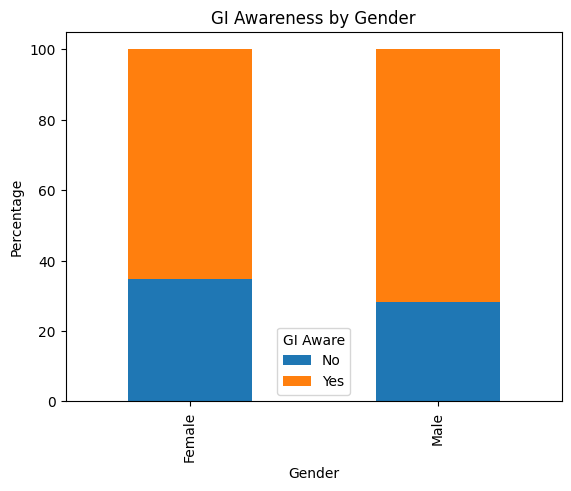

In [27]:
awareness_by_gender.plot(kind='bar', stacked=True)
import matplotlib.pyplot as plt
plt.xlabel('Gender')
plt.title('GI Awareness by Gender')
plt.ylabel('Percentage')
plt.xticks()
plt.legend(title='GI Aware')
plt.show()

In [18]:
ecom_state = pd.crosstab(df['State'], df['Uses_Ecommerce'], normalize='index') * 100


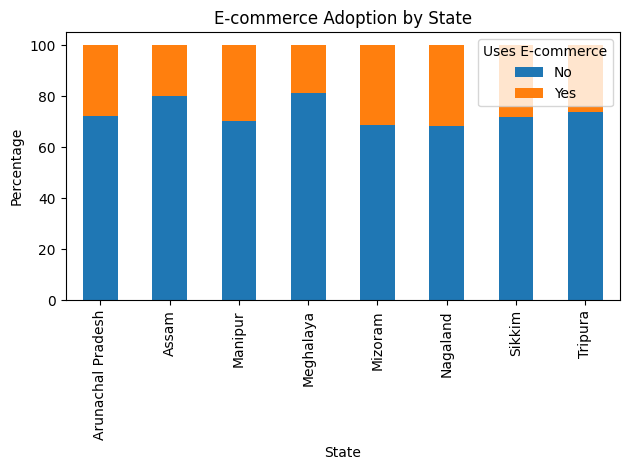

In [23]:
ecom_state.plot(kind='bar', stacked=True)
plt.title('E-commerce Adoption by State')
plt.ylabel('Percentage')
plt.xticks()
plt.legend(title='Uses E-commerce')
plt.tight_layout()
plt.show()

In [24]:
subsidy_vs_awareness = pd.crosstab(df['Received_Subsidy'], df['GI_Aware'], normalize='index') * 100

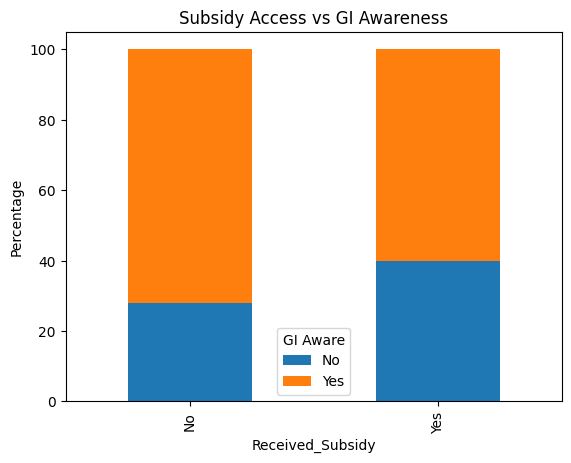

In [26]:
subsidy_vs_awareness.plot(kind='bar', stacked=True)
plt.title('Subsidy Access vs GI Awareness')
plt.ylabel('Percentage')
plt.xticks()
plt.legend(title='GI Aware')
plt.show()

In [29]:
import seaborn as sns

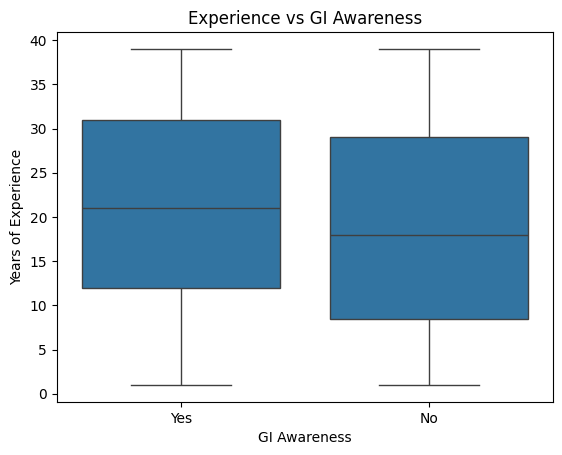

In [31]:
sns.boxplot(x='GI_Aware', y='Years_of_Experience', data=df)
plt.title('Experience vs GI Awareness')
plt.xlabel('GI Awareness')
plt.ylabel('Years of Experience')
plt.show()


In [32]:
df.groupby(['State', 'Gender'])[['GI_Aware', 'Received_Subsidy', 'Uses_Ecommerce']].count().to_csv('summary_table.csv')


In [34]:
summary_df = pd.read_csv('summary_table.csv')
display(summary_df)

,State,Gender,GI_Aware,Received_Subsidy,Uses_Ecommerce
0,Arunachal Pradesh,Female,30,30,30
1,Arunachal Pradesh,Male,13,13,13
2,Assam,Female,26,26,26
3,Assam,Male,9,9,9
4,Manipur,Female,24,24,24
5,Manipur,Male,13,13,13
6,Meghalaya,Female,29,29,29
7,Meghalaya,Male,19,19,19
8,Mizoram,Female,14,14,14
9,Mizoram,Male,21,21,21
